In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential # initiate the mode 
from tensorflow.keras.layers import Dense, Activation, Dropout # add the layers
from tensorflow.keras.optimizers import Adam # optimizer 

In [2]:
data = "C:\\Users\\Nattakorn\\Desktop\\IS project\\data.csv"
df = pd.read_csv(data)
df.info()
print('shape = ' ,df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Encoding

In [4]:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(df['diagnosis'])
labels_one_hot = tf.keras.utils.to_categorical(labels)
df['target'] = labels
print('shape labels_one_hot =  ',labels_one_hot.shape) # [1,0] [0,1]
print('shape labels = ',labels.shape)

shape labels_one_hot =   (569, 2)
shape labels =  (569,)


# drop

In [5]:
df.drop(['id','diagnosis'],axis=1,inplace=True)
df.dropna(inplace=True,axis=1)

In [6]:
df.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
target                     0
dtype: int64

# describe

In [7]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# Count Value

0    357
1    212
Name: target, dtype: int64


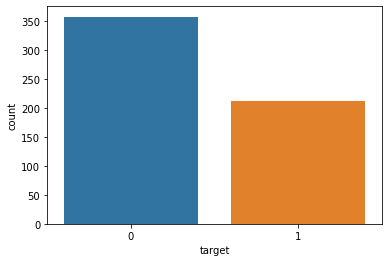

In [9]:
sns.countplot(x = 'target' ,data = df)
print(df['target'].value_counts())

In [11]:
df.groupby('target').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


<AxesSubplot:>

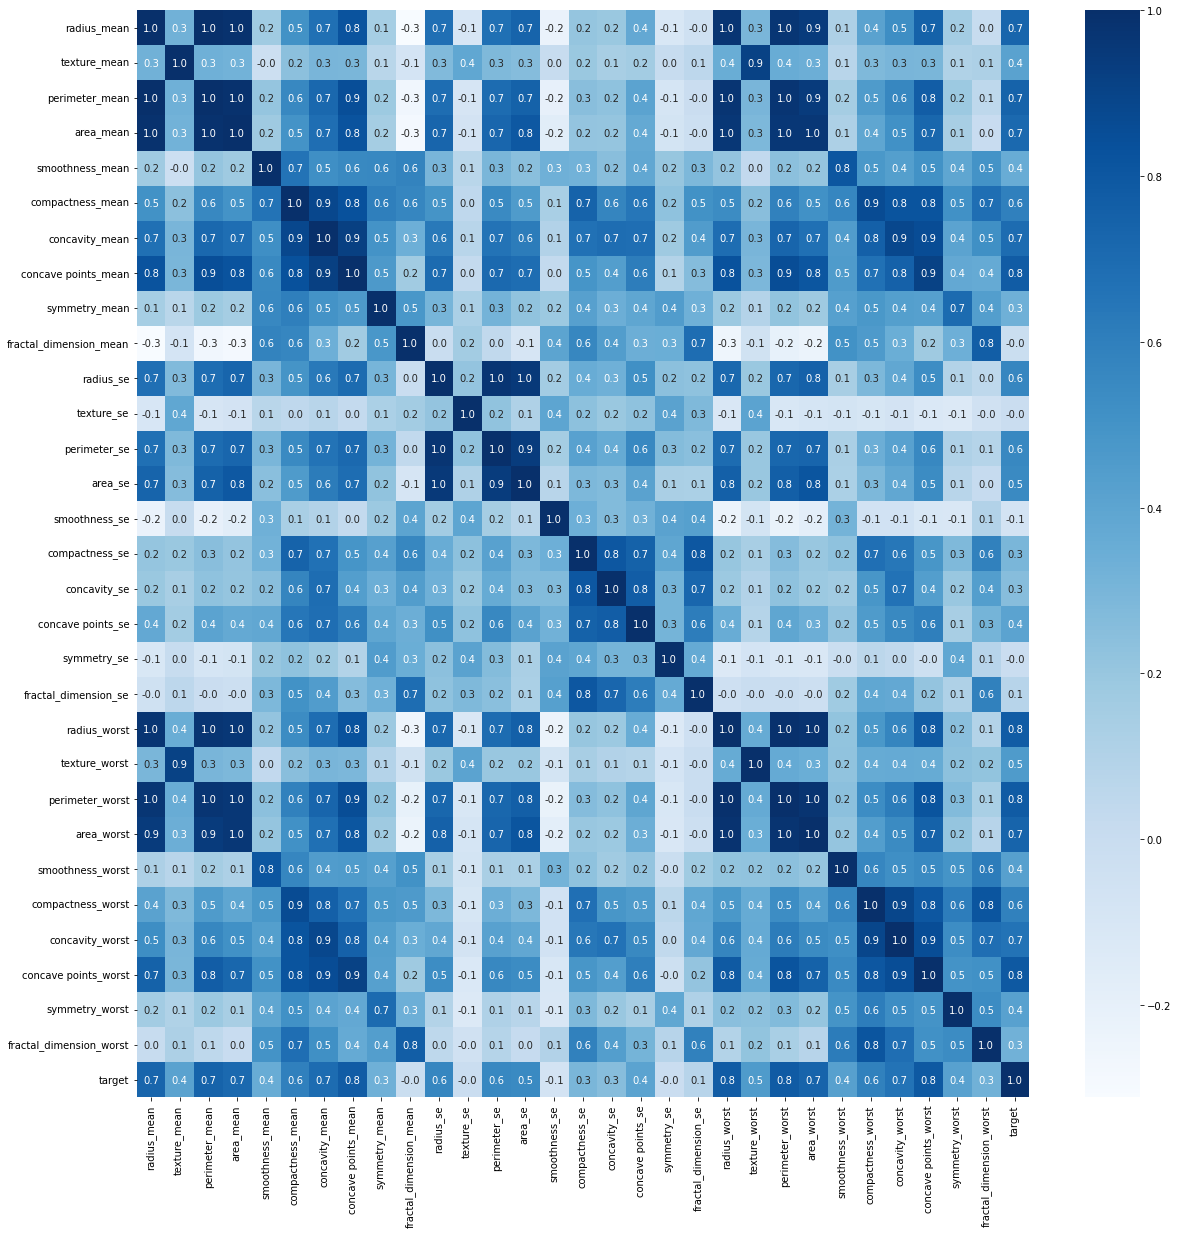

In [19]:
correlation_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')

# Model

In [48]:
x = df.iloc[: , :-1]
y = df.iloc[: , -1]
x_train, X_test, y_train, Y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [49]:
x_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
287,12.890,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.620,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915
512,13.400,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,16.410,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
402,12.960,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,0.05899,...,14.130,24.61,96.31,621.9,0.09329,0.23180,0.16040,0.06608,0.3207,0.07247
446,17.750,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,0.05916,...,21.530,38.54,145.40,1437.0,0.14010,0.37620,0.63990,0.19700,0.2972,0.09075
210,20.580,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,0.1765,0.05024,...,23.240,27.84,158.30,1656.0,0.11780,0.29200,0.38610,0.19200,0.2909,0.05865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [50]:
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
X_test = scaler.transform(X_test)
print(x_train)

[[0.2546158  0.11531958 0.24164177 ... 0.18439863 0.14665878 0.11961682]
 [0.27959254 0.36557322 0.28965713 ... 0.704811   0.39818648 0.47355036]
 [0.25804398 0.29015894 0.25793143 ... 0.22707904 0.32367435 0.14776195]
 ...
 [0.32317939 0.2404464  0.30146536 ... 0.11453608 0.17602996 0.05222109]
 [0.30799745 0.33513696 0.30729834 ... 0.62783505 0.31815494 0.42777213]
 [0.21984426 0.36557322 0.20842225 ... 0.25536082 0.22255076 0.11648016]]


In [99]:
print(x_train.max())
print(x_train.min())

1.0000000000000002
0.0


In [64]:
model = Sequential()
model.add(Dense(30,
                activation='relu'))
model.add(Dense(100,
                activation='relu'))
model.add(Dense(100,
                activation='relu'))
model.add(Dense(1,
                activation='sigmoid')) 

model.compile(optimizer='adam',loss='binary_crossentropy')


In [65]:
model.fit(x=x_train,y=y_train,
          validation_data=(X_test,Y_test),epochs=600)

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6460 - val_loss: 0.5778
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5319 - val_loss: 0.4245
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3902 - val_loss: 0.2747
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2786 - val_loss: 0.1883
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2262 - val_loss: 0.1697
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1968 - val_loss: 0.1371
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1694 - val_loss: 0.1167
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1504 - val_loss: 0.0997
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1589 - val_loss: 0.1525
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1372 - val_loss: 0.0891
Epoch 11

14/14 [==============================] - 0s 5ms/step - loss: 0.0073 - val_loss: 0.0780
Epoch 83/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0077 - val_loss: 0.1359
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0107 - val_loss: 0.1028
Epoch 85/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0067 - val_loss: 0.0848
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0067 - val_loss: 0.1172
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0095 - val_loss: 0.1466
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0876
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 0.1247
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.0929
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0987
Epoch 92/600


14/14 [==============================] - 0s 4ms/step - loss: 4.1967e-04 - val_loss: 0.1728
Epoch 163/600
14/14 [==============================] - 0s 4ms/step - loss: 4.0762e-04 - val_loss: 0.1768
Epoch 164/600
14/14 [==============================] - 0s 5ms/step - loss: 3.8244e-04 - val_loss: 0.1715
Epoch 165/600
14/14 [==============================] - 0s 5ms/step - loss: 3.8734e-04 - val_loss: 0.1754
Epoch 166/600
14/14 [==============================] - 0s 4ms/step - loss: 3.6758e-04 - val_loss: 0.1764
Epoch 167/600
14/14 [==============================] - 0s 2ms/step - loss: 3.7001e-04 - val_loss: 0.1787
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 3.6870e-04 - val_loss: 0.1778
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 4.5760e-04 - val_loss: 0.1848
Epoch 170/600
14/14 [==============================] - 0s 5ms/step - loss: 4.0979e-04 - val_loss: 0.1758
Epoch 171/600
14/14 [==============================] - 0s 6ms/step - 

Epoch 240/600
14/14 [==============================] - 0s 4ms/step - loss: 9.2135e-05 - val_loss: 0.2136
Epoch 241/600
14/14 [==============================] - 0s 5ms/step - loss: 1.0592e-04 - val_loss: 0.2142
Epoch 242/600
14/14 [==============================] - 0s 6ms/step - loss: 9.5809e-05 - val_loss: 0.2125
Epoch 243/600
14/14 [==============================] - 0s 5ms/step - loss: 8.9830e-05 - val_loss: 0.2140
Epoch 244/600
14/14 [==============================] - 0s 3ms/step - loss: 8.5113e-05 - val_loss: 0.2119
Epoch 245/600
14/14 [==============================] - 0s 3ms/step - loss: 8.7473e-05 - val_loss: 0.2161
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 8.5779e-05 - val_loss: 0.2139
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 8.3995e-05 - val_loss: 0.2135
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 8.3878e-05 - val_loss: 0.2135
Epoch 249/600
14/14 [==============================] - 

Epoch 318/600
14/14 [==============================] - 0s 5ms/step - loss: 3.2118e-05 - val_loss: 0.2356
Epoch 319/600
14/14 [==============================] - 0s 14ms/step - loss: 3.0966e-05 - val_loss: 0.2349
Epoch 320/600
14/14 [==============================] - 0s 2ms/step - loss: 3.0743e-05 - val_loss: 0.2388
Epoch 321/600
14/14 [==============================] - 0s 16ms/step - loss: 3.0258e-05 - val_loss: 0.2320
Epoch 322/600
14/14 [==============================] - 0s 3ms/step - loss: 3.2298e-05 - val_loss: 0.2415
Epoch 323/600
14/14 [==============================] - 0s 4ms/step - loss: 2.9382e-05 - val_loss: 0.2358
Epoch 324/600
14/14 [==============================] - 0s 15ms/step - loss: 2.9531e-05 - val_loss: 0.2399
Epoch 325/600
14/14 [==============================] - 0s 3ms/step - loss: 2.8622e-05 - val_loss: 0.2433
Epoch 326/600
14/14 [==============================] - 0s 8ms/step - loss: 2.9550e-05 - val_loss: 0.2400
Epoch 327/600
14/14 [==============================]

Epoch 396/600
14/14 [==============================] - 0s 3ms/step - loss: 1.2914e-05 - val_loss: 0.2581
Epoch 397/600
14/14 [==============================] - 0s 3ms/step - loss: 1.2445e-05 - val_loss: 0.2599
Epoch 398/600
14/14 [==============================] - 0s 3ms/step - loss: 1.2217e-05 - val_loss: 0.2610
Epoch 399/600
14/14 [==============================] - 0s 2ms/step - loss: 1.2102e-05 - val_loss: 0.2608
Epoch 400/600
14/14 [==============================] - 0s 3ms/step - loss: 1.2011e-05 - val_loss: 0.2636
Epoch 401/600
14/14 [==============================] - 0s 3ms/step - loss: 1.1927e-05 - val_loss: 0.2631
Epoch 402/600
14/14 [==============================] - 0s 5ms/step - loss: 1.2091e-05 - val_loss: 0.2643
Epoch 403/600
14/14 [==============================] - 0s 6ms/step - loss: 1.3028e-05 - val_loss: 0.2625
Epoch 404/600
14/14 [==============================] - 0s 5ms/step - loss: 1.5198e-05 - val_loss: 0.2785
Epoch 405/600
14/14 [==============================] - 

14/14 [==============================] - 0s 5ms/step - loss: 5.8951e-06 - val_loss: 0.2761
Epoch 475/600
14/14 [==============================] - 0s 6ms/step - loss: 6.1939e-06 - val_loss: 0.2822
Epoch 476/600
14/14 [==============================] - 0s 5ms/step - loss: 5.4699e-06 - val_loss: 0.2765
Epoch 477/600
14/14 [==============================] - 0s 7ms/step - loss: 5.6704e-06 - val_loss: 0.2777
Epoch 478/600
14/14 [==============================] - 0s 7ms/step - loss: 5.5444e-06 - val_loss: 0.2813
Epoch 479/600
14/14 [==============================] - 0s 7ms/step - loss: 5.5787e-06 - val_loss: 0.2800
Epoch 480/600
14/14 [==============================] - 0s 3ms/step - loss: 5.2943e-06 - val_loss: 0.2816
Epoch 481/600
14/14 [==============================] - 0s 3ms/step - loss: 5.3227e-06 - val_loss: 0.2823
Epoch 482/600
14/14 [==============================] - 0s 3ms/step - loss: 5.2660e-06 - val_loss: 0.2808
Epoch 483/600
14/14 [==============================] - 0s 3ms/step - 

14/14 [==============================] - 0s 5ms/step - loss: 2.6371e-06 - val_loss: 0.2976
Epoch 553/600
14/14 [==============================] - 0s 6ms/step - loss: 2.6414e-06 - val_loss: 0.2970
Epoch 554/600
14/14 [==============================] - 0s 5ms/step - loss: 2.6390e-06 - val_loss: 0.2995
Epoch 555/600
14/14 [==============================] - 0s 5ms/step - loss: 2.6327e-06 - val_loss: 0.2982
Epoch 556/600
14/14 [==============================] - 0s 7ms/step - loss: 2.6829e-06 - val_loss: 0.2962
Epoch 557/600
14/14 [==============================] - 0s 8ms/step - loss: 2.6014e-06 - val_loss: 0.3004
Epoch 558/600
14/14 [==============================] - 0s 8ms/step - loss: 2.5820e-06 - val_loss: 0.3002
Epoch 559/600
14/14 [==============================] - 0s 7ms/step - loss: 2.5134e-06 - val_loss: 0.3006
Epoch 560/600
14/14 [==============================] - 0s 5ms/step - loss: 2.4430e-06 - val_loss: 0.2968
Epoch 561/600
14/14 [==============================] - 0s 7ms/step - 

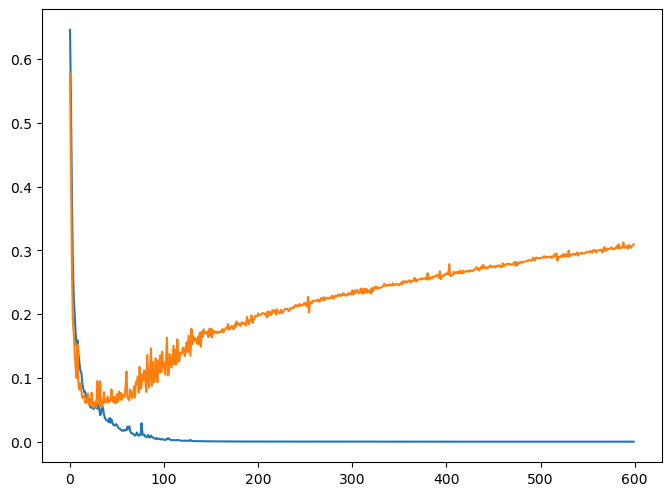

In [70]:
history_loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(8,6),dpi=100)
plt.plot(history_loss)

In [71]:
history_loss['val_loss'].argmin() 

25

loss val
0.2  0.5 1
0.2  0.5 2
0.2  0.5 3

In [74]:
model2 = Sequential()
model2.add(Dense(30,
                activation='relu'))
model2.add(Dense(100,
                activation='relu'))
model2.add(Dense(100,
                activation='relu'))
model2.add(Dense(1,
                activation='sigmoid')) 

model2.compile(optimizer='adam',loss='binary_crossentropy')
model2.fit(x=x_train,y=y_train,
          validation_data=(X_test,Y_test),epochs=25)

Epoch 1/25
14/14 [==============================] - 0s 8ms/step - loss: 0.6603 - val_loss: 0.6087
Epoch 2/25
14/14 [==============================] - 0s 3ms/step - loss: 0.5873 - val_loss: 0.5081
Epoch 3/25
14/14 [==============================] - 0s 4ms/step - loss: 0.4822 - val_loss: 0.3715
Epoch 4/25
14/14 [==============================] - 0s 4ms/step - loss: 0.3640 - val_loss: 0.2551
Epoch 5/25
14/14 [==============================] - 0s 3ms/step - loss: 0.2762 - val_loss: 0.1934
Epoch 6/25
14/14 [==============================] - 0s 4ms/step - loss: 0.2320 - val_loss: 0.1580
Epoch 7/25
14/14 [==============================] - 0s 3ms/step - loss: 0.2074 - val_loss: 0.1483
Epoch 8/25
14/14 [==============================] - 0s 4ms/step - loss: 0.2054 - val_loss: 0.1292
Epoch 9/25
14/14 [==============================] - 0s 4ms/step - loss: 0.1685 - val_loss: 0.1131
Epoch 10/25
14/14 [==============================] - 0s 4ms/step - loss: 0.1557 - val_loss: 0.1032
Epoch 11/25
14/14 [

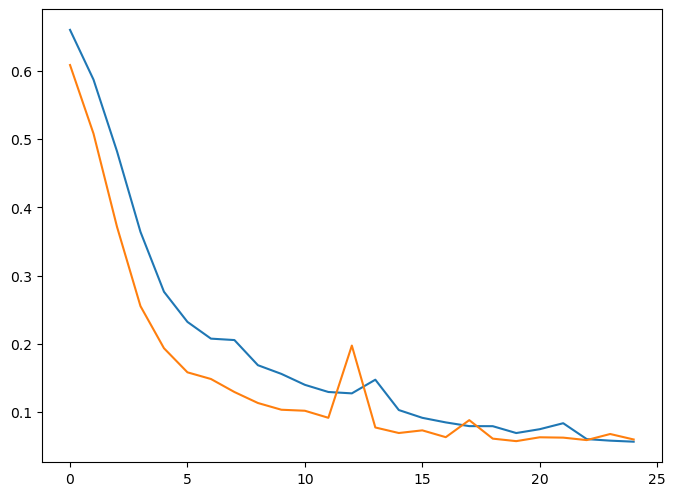

In [75]:
history_loss2 = pd.DataFrame(model2.history.history)
plt.figure(figsize=(8,6),dpi=100)
plt.plot(history_loss2)

In [81]:
from sklearn.metrics import classification_report,confusion_matrix 
model_predic = model2.predict(X_test)
predictions = np.round(model_predic).astype(int)
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        89
           1       1.00      0.96      0.98        54

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143



In [97]:
accuracy = (Y_test == predictions.reshape(143)).sum() / len(Y_test)
print(f'model accuracy {accuracy*100:.2f}%')

model accuracy 98.60%


# Save model

In [100]:
json_file = model2.to_json()
with open("cancer_predictions.json","w") as file:
    file.write(json_file)
model.save_weights("cancer_predictions.h5")
file = open("cancer_predictions.json","r")
loaded_model_json = file.read()
file.close()